## Mini-Project 4 (Part II): Solving Wild Tic-Tac-Toe Using Minimax 


#### CSC 215 Artificial Intelligence (Fall 2019)

#### Dr. Haiquan Chen, California State University, Sacramento

In [16]:
import random
import time

current = []


def show(board, player):
    print(player, ":\n")
    for i in range(3):
        for j in range(9):
            if j // 3 == i:
                print(" ", board[j], end="  |")
        print()
        print("------------------")


def check_line(char, pos1, pos2, pos3):
    return pos1 == pos2 == pos3 == char


def check_all(board, char):
    if check_line(char, board[0], board[1], board[2]):
        return True
    elif check_line(char, board[3], board[4], board[5]):
        return True
    elif check_line(char, board[6], board[7], board[8]):
        return True
    elif check_line(char, board[0], board[3], board[6]):
        return True
    elif check_line(char, board[1], board[4], board[7]):
        return True
    elif check_line(char, board[2], board[5], board[8]):
        return True
    elif check_line(char, board[0], board[4], board[8]):
        return True
    elif check_line(char, board[2], board[4], board[6]):
        return True
    else:
        return False


def check_draw(board):
    return set(board) == {"o", "x"}


def check_game_over(board, player):
    if check_all(board, "x") or check_all(board, "o"):
        if player == "P1":
            return -10          # this should be -10 not 10
        elif player == "P2":
            return 10           # this should be 10 not -10
    elif check_draw(board):
        return 0
    else: 
        return False

def availableMoves(board):
    #Return empty spaces on the board
    moves = []
    for i in range(0, len(board)):
        if board[i] != "x" and board[i] != "o":
            moves.append(i)
    return moves

def makeMove(board,board1,position, player):
    #Make a move on the board
    board1[position] = 'o'
    board[position] = 'x'
    return board,board1

def minimax(board, player):
    global current
    current_score = check_game_over(board, player)
    
    if current_score is not False:
        return current_score
    
    scores = []
    moves = []
    p1_win = False
    p2_win = False
    flag = None 
    # check all possible moves.  
    
    availablemoves = availableMoves(board)
    
    
    for i in availablemoves:
        new_board1 = board.copy()
        new_board2 = board.copy()
        node = {}
        new_board1,new_board2 = makeMove(new_board1, new_board2 , i , player)
         
        if player == "P1":   
            score = minimax(new_board1, "P2")
            score1 = minimax(new_board2, "P2")
               
        if player == "P2":
            score = minimax(new_board1, "P1")
            score1 = minimax(new_board2, "P1")    
        
        node['move1'] = new_board1
        node['score'] = score
        node['move2'] = new_board2
        node['score1'] = score1
            
        moves.append(node)    
 
                        
    if player == "P1":
    # Find the move with the highest score.   Add that move to current and return that score. 
    
        best_score = -100
        best_node = {}
        for node in moves:
            if node['score'] > node['score1']:
                if node['score'] > best_score:
                    best_score = node['score']
                    best_node = node
                    flag = 1
            else:
                if node['score1'] > best_score:
                    best_score = node['score1']
                    best_node = node
                    flag = 0
        if flag == 1:
            current.append(best_node['move1']) 
        else:
            current.append(best_node['move2'])
    
    
    elif player == "P2":
    # Find the move with the lowest score.   Add that move to current and return that score.    
        
        best_score = 100
        best_node = {}    
        for node in moves:
            if node['score'] < node['score1']:
                
                if node['score'] < best_score:
                    best_score = node['score']
                    best_node = node
                    flag = 1
            else:
                if node['score1'] < best_score:
                    best_score = node['score1']
                    best_node = node
                    flag = 0
        if flag == 1:
            current.append(best_node['move1']) 
        else:
            current.append(best_node['move2']) 
        
    return best_score    
       

## Optimal vs Optimal

In [17]:
def optimal_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    print("Player 1 and Player 2 Both play optimally.\n")
    show(board, "Board")
    curr = ["P1", "P2"]
    
    
    #board[0] = 'x'
    #show(board, "P1")
    #print()
    #i = 1
    
    
    i = 0
    while True:
        print()
        minimax(board, curr[i])
        show(current[len(current) - 1], curr[i])
        board = current[len(current) - 1]
        print()
        if check_all(board, "x") or check_all(board, "o"):
            print(curr[i] + " Wins!")
            return curr[i]
        elif check_draw(board):
            print("Draw!")
            return "Draw"
        i = (i + 1) % 2

start_time = time.time()
optimal_vs_optimal()
print("\nSeconds Elapsed:", time.time() - start_time)

Player 1 and Player 2 Both play optimally.

Board :

  0  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  6  |  7  |  8  |
------------------

P1 :

  0  |  1  |  2  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------


P2 :

  o  |  1  |  2  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------


P1 :

  o  |  1  |  2  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  o  |
------------------

P1 Wins!

Seconds Elapsed: 576.2899258136749


In [ ]:
result = []
def optimal_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    #print("Player 1 and Player 2 Both play optimally.\n")
    #show(board, "Board")
    curr = ["P1", "P2"]
    
    
    #board[0] = 'x'
    #show(board, "P1")
    #print()
    #i = 1
    
    
    i = 0
    while True:
        #print()
        minimax(board, curr[i])
        #show(current[len(current) - 1], curr[i])
        board = current[len(current) - 1]
        #print()
        if check_all(board, "x") or check_all(board, "o"):
            #print(curr[i] + " Wins!")
            result.append(curr[i] + 'win')
            return curr[i]
        elif check_draw(board):
            #print("Draw!")
            result.append('draw')
            return "Draw"
        i = (i + 1) % 2

start_time = time.time()
for i in range(10):
    optimal_vs_optimal()
print(result)
print("\nSeconds Elapsed:", time.time() - start_time)

In [ ]:
import pandas as pd
df = pd.Series(result)
df.value_counts().plot(kind = 'bar')

## Random vs Optimal

In [18]:
def random_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    print("Player 1 plays randomly, and Player 2 plays optimally.\n")
    show(board, "Board")
    print()
    curr = ["P1", "P2"]
    i = 0
    while True:
        print()
        if curr[i] == "P1":
            valid_choice = [i for i in range(9) if board[i] != "x" and board[i] != "o"]
            ran = valid_choice[int(random.random() * len(valid_choice))]
            ran2 = int(random.random() * 2)
            if ran2 == 0:
                board[ran] = "x"
            elif ran2 == 1:
                board[ran] = "o"
            show(board, "P1")
        elif curr[i] == "P2":
            minimax(board, "P2")
            show(current[len(current) - 1], "P2")
            board = current[len(current) - 1]
        print()
        if check_all(board, "x") or check_all(board, "o"):
            print(curr[i] + " Wins!")
            return curr[i]
        elif check_draw(board):
            print("Draw!")
            return "Draw"
        i = (i + 1) % 2


start_time = time.time()
random_vs_optimal()
print("\nSeconds Elapsed:", time.time() - start_time)

Player 1 plays randomly, and Player 2 plays optimally.

Board :

  0  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  6  |  7  |  8  |
------------------


P1 :

  0  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  x  |  7  |  8  |
------------------


P2 :

  o  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  x  |  7  |  8  |
------------------


P1 :

  o  |  1  |  2  |
------------------
  3  |  o  |  5  |
------------------
  x  |  7  |  8  |
------------------


P2 :

  o  |  1  |  2  |
------------------
  3  |  o  |  5  |
------------------
  x  |  7  |  o  |
------------------

P2 Wins!

Seconds Elapsed: 36.666415214538574


In [22]:
result = []
def random_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    #print("Player 1 plays randomly, and Player 2 plays optimally.\n")
    #show(board, "Board")
    #print()
    curr = ["P1", "P2"]
    i = 0
    while True:
        #print()
        if curr[i] == "P1":
            valid_choice = [i for i in range(9) if board[i] != "x" and board[i] != "o"]
            ran = valid_choice[int(random.random() * len(valid_choice))]
            ran2 = int(random.random() * 2)
            if ran2 == 0:
                board[ran] = "x"
            elif ran2 == 1:
                board[ran] = "o"
            #show(board, "P1")
        elif curr[i] == "P2":
            minimax(board, "P2")
            #show(current[len(current) - 1], "P2")
            board = current[len(current) - 1]
        #print()
        if check_all(board, "x") or check_all(board, "o"):
            #print(curr[i] + " Wins!")
            result.append(curr[i] + 'win')
            return curr[i]
        elif check_draw(board):
            #print("Draw!")
            result.append('draw')
            return "Draw"
        i = (i + 1) % 2


start_time = time.time()
for i in range(20):
    random_vs_optimal()
print(result)    
print("\nSeconds Elapsed:", time.time() - start_time)

['P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'draw', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win', 'P2win']

Seconds Elapsed: 542.8106367588043


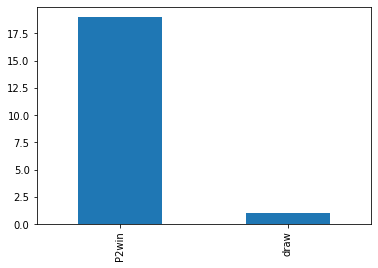

In [24]:
import pandas as pd
df = pd.Series(result)
df.value_counts().plot(kind = 'bar')

## You vs Optimal

In [15]:
def you_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    print("You play as Player 1\n")
    show(board, "Board")
    print()
    curr = ["P1", "P2"]
    i = 0
    while True:
        if curr[i] == "P1":
            valid_choice = [str(i) for i in range(9) if i in board]
            while True:
                cell = input("Please enter a valid cell (" + ", ".join(valid_choice) + "): ")
                if cell in valid_choice:
                    break
            while True:
                character = input("Please enter a valid character (x, o): ").lower()
                if character in ["x", "o"]:
                    break
            print()
            board[int(cell)] = character
            show(board, curr[i])
        elif curr[i] == "P2":
            minimax(board, "P2")
            show(current[len(current) - 1], "P2")
            board = current[len(current) - 1]
        print()
        if check_all(board, "x") or check_all(board, "o"):
            print(curr[i] + " Wins!")
            return curr[i]
        if check_draw(board):
            print("Draw!")
            return "Draw"
        i = (i + 1) % 2


you_vs_optimal()

You play as Player 1

Board :

  0  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  6  |  7  |  8  |
------------------

Please enter a valid cell (0, 1, 2, 3, 4, 5, 6, 7, 8): 6
Please enter a valid character (x, o): x

P1 :

  0  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  x  |  7  |  8  |
------------------

P2 :

  o  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  x  |  7  |  8  |
------------------

Please enter a valid cell (1, 2, 3, 4, 5, 7, 8): 3
Please enter a valid character (x, o): x

P1 :

  o  |  1  |  2  |
------------------
  x  |  4  |  5  |
------------------
  x  |  7  |  8  |
------------------

P2 :

  o  |  x  |  2  |
------------------
  x  |  4  |  5  |
------------------
  x  |  7  |  8  |
------------------

Please enter a valid cell (2, 4, 5, 7, 8): 2
Please enter a valid character (x, o): o

P1 :

  o  |  x  |  o  |
------------------
  x  |  4  |  5  |
------------------
  x  |  7

'Draw'